# What is Valorant

- Valorant is a free to play First Person Shooter Game developed by Riot Games
  It is 5v5 attack defense scenario game with each player having options to select
  from a wide variety of playable characters with unique abilities.
  
- Each team consists of 5 players and the first team to reach 13 rounds wins.

- The attacking and defending sides are switched once after first 12 rounds

- The attacking team has the objective to plant a bomb called 'The Spike' and let it blow off or eliminate the opponents
  The defending team has the objective to defuse the Spike or eliminate the opponents before that.

### Importing Libraries

Python libraries are imported to assist us in the process of creating our project

The libraries imported are:

1.   numpy
2.   pandas
3.   seaborn
4.   tensorflow
5.   sklearn
6.   warnings
7.   matplotlib
8.   pickle
9.   statsmodel.tsa.ARIMA



In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import tensorflow as tf
import sklearn.metrics as metrics
import warnings

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.compose import ColumnTransformer

from statsmodels.tsa.arima.model import ARIMA

import pickle
from sklearn import svm
from tensorflow import keras

In [3]:
warnings.filterwarnings('ignore')

### Importing Historical Dataset

The data is being loaded from Google Drive and stored into a Data Frame
The duplicates are removed.

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

path = "/content/drive/MyDrive/ColabNotebooks/match1.csv"
df = pd.read_csv(path)
df = df.drop_duplicates(keep='first')
df

Mounted at /content/drive/


,Maps,Team_A,Team_B,Score_A,Score_B,Player_1A,Agent_1A,Rating_1A,ACS_1A,Kills_1A,...,4k_5B,5k_5B,1v1_5B,1v2_5B,1v3_5B,1v4_5B,1v5_5B,Econ_5B,Plants_5B,Defuses_5B
0,Split,Paper Rex,Evil Geniuses,10,13,Jinggg,Raze,0.79,208.0,13.0,...,0,0,0,0,0,0,0,66,3,2
1,Ascent,Paper Rex,Evil Geniuses,13,11,Jinggg,Raze,0.98,272.0,20.0,...,0,0,0,0,0,0,0,36,4,0
2,Bind,Paper Rex,Evil Geniuses,5,13,Jinggg,Raze,0.70,188.0,11.0,...,0,0,0,0,0,0,0,78,0,0
3,Lotus,Paper Rex,Evil Geniuses,10,13,Jinggg,Raze,1.20,268.0,19.0,...,2,0,0,0,0,0,0,81,3,0
4,Ascent,Evil Geniuses,LOUD,14,12,Boostio,Killjoy,0.77,174.0,17.0,...,0,0,0,0,0,0,0,34,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702,Split,Mandatory,Team Vitality,4,13,APO,Viper,0.75,182.0,10.0,...,1,0,1,0,0,0,0,124,1,1
3703,Bind,Team Vitality,Team BDS,10,13,ShadoW,Sova,1.13,198.0,16.0,...,0,0,0,0,0,0,0,48,0,0
3704,Split,Team Vitality,Team BDS,11,13,ShadoW,Viper,0.90,174.0,13.0,...,0,0,0,0,0,0,0,42,0,0
3705,Breeze,Sector One,Team Vitality,3,13,Goaster,Jett,1.04,248.0,13.0,...,1,0,0,0,0,0,0,73,0,1


In [5]:
df.describe()

,Score_A,Score_B,Rating_1A,ACS_1A,Kills_1A,Deaths_1A,Assists_1A,Kills - Deaths_1A,KAST %_1A,ADR_1A,...,4k_5B,5k_5B,1v1_5B,1v2_5B,1v3_5B,1v4_5B,1v5_5B,Econ_5B,Plants_5B,Defuses_5B
count,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,...,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000,2814.000000
mean,10.834755,10.184790,1.019250,201.457001,14.709311,14.545842,6.231343,4.966596,72.130064,131.586709,...,0.150675,0.018479,0.205402,0.107676,0.035537,0.005330,0.000711,51.617271,1.510661,0.415778
std,3.426033,3.759945,0.309659,60.264320,5.313299,3.916820,3.701557,3.662284,11.873555,38.060257,...,0.389205,0.137313,0.455358,0.326773,0.188965,0.072828,0.026655,16.466674,1.868897,0.656814
min,0.000000,0.000000,0.170000,51.000000,2.000000,3.000000,0.000000,0.000000,15.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000
25%,9.000000,7.000000,0.800000,159.000000,11.000000,12.000000,3.000000,2.000000,64.000000,105.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,13.000000,12.000000,1.000000,196.000000,14.000000,15.000000,6.000000,4.000000,73.000000,128.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1.000000,0.000000
75%,13.000000,13.000000,1.210000,238.000000,18.000000,17.000000,8.000000,7.000000,81.000000,155.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,2.000000,1.000000
max,21.000000,20.000000,2.330000,476.000000,43.000000,31.000000,23.000000,23.000000,100.000000,289.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,1.000000,1.000000,164.000000,11.000000,4.000000


### Functions to get Dictionaries



Lable Encoding is the process of converting 'Categorical Data' into 'numerical values'

There are 4 label encoding tasks:


1.   Encoding different 'MAPS'
2.   Encoding different 'TEAM' names
3.   Encoding different 'PLAYER' names
4.   Encoding different 'AGENT' names





In [6]:
def getTeams(df):
    a1 = np.array(df['Team_A'].unique())
    a2 = np.array(df['Team_B'].unique())
    a3 = np.concatenate((a1,a2))
    a3 = list(set(a3))
    a3.sort()
    team_encoder = LabelEncoder()
    encoded_labels = team_encoder.fit_transform(a3)
    dict_a3 = dict(zip(a3, encoded_labels))
    return dict_a3

def getMaps(df):
    maps = np.array(df['Maps'].unique())
    map_encoder = LabelEncoder()
    encoded_maps = map_encoder.fit_transform(maps)
    dict_maps = dict(zip(maps, encoded_maps))
    return (dict_maps)

def getAgents(df):
    ag1A = np.array(df['Agent_1A'].unique())
    ag2A = np.array(df['Agent_2A'].unique())
    ag3A = np.array(df['Agent_3A'].unique())
    ag4A = np.array(df['Agent_4A'].unique())
    ag5A = np.array(df['Agent_5A'].unique())
    ag1B = np.array(df['Agent_1B'].unique())
    ag2B = np.array(df['Agent_2B'].unique())
    ag3B = np.array(df['Agent_3B'].unique())
    ag4B = np.array(df['Agent_4B'].unique())
    ag5B = np.array(df['Agent_5B'].unique())
    agents = np.concatenate((ag1A,ag2A,ag3A,ag4A,ag5A,ag1B,ag2B,ag3B,ag4B,ag5B))
    agents = list(set(agents))
    agents.sort()
    agent_encoder = LabelEncoder()
    encoded_agents = agent_encoder.fit_transform(agents)
    dict_agents = dict(zip(agents, encoded_agents))
    return (dict_agents)

def getPlayers(df):
    p1a = np.array(df['Player_1A'])
    p2a = np.array(df['Player_2A'])
    p3a = np.array(df['Player_3A'])
    p4a = np.array(df['Player_4A'])
    p5a = np.array(df['Player_5A'])
    p1b = np.array(df['Player_1B'])
    p2b = np.array(df['Player_2B'])
    p3b = np.array(df['Player_3B'])
    p4b = np.array(df['Player_4B'])
    p5b = np.array(df['Player_5B'])
    player = np.concatenate((p1a,p2a,p3a,p4a,p5a,p1b,p2b,p3b,p4b,p5b))
    player = list(set(player))
    player = np.array(player)
    player_encoder = LabelEncoder()
    enc_player = player_encoder.fit_transform(player)
    dict_player = dict(zip(player, enc_player))
    return (dict_player)

The dictionaries are collected and function is written.

Function encode labels: used to apply the conversion of labels to numerical values, in the dataframe using *.map()* function



In [7]:
dict_teams = getTeams(df)
dict_maps = getMaps(df)
dict_agents = getAgents(df)
dict_players = getPlayers(df)

def encodeLabels(df):
    df['Team_A'] = df['Team_A'].map(dict_teams)
    df['Team_B'] = df['Team_B'].map(dict_teams)
    df['Maps'] = df['Maps'].map(dict_maps)
    df['Agent_1A'] = df['Agent_1A'].map(dict_agents)
    df['Agent_2A'] = df['Agent_2A'].map(dict_agents)
    df['Agent_3A'] = df['Agent_3A'].map(dict_agents)
    df['Agent_4A'] = df['Agent_4A'].map(dict_agents)
    df['Agent_5A'] = df['Agent_5A'].map(dict_agents)
    df['Agent_1B'] = df['Agent_1B'].map(dict_agents)
    df['Agent_2B'] = df['Agent_2B'].map(dict_agents)
    df['Agent_3B'] = df['Agent_3B'].map(dict_agents)
    df['Agent_4B'] = df['Agent_4B'].map(dict_agents)
    df['Agent_5B'] = df['Agent_5B'].map(dict_agents)
    df.loc[:,'Player_1A'] = df.loc[:,'Player_1A'].map(dict_players)
    df.loc[:,'Player_2A'] = df.loc[:,'Player_2A'].map(dict_players)
    df.loc[:,'Player_3A'] = df.loc[:,'Player_3A'].map(dict_players)
    df.loc[:,'Player_4A'] = df.loc[:,'Player_4A'].map(dict_players)
    df.loc[:,'Player_5A'] = df.loc[:,'Player_5A'].map(dict_players)
    df.loc[:,'Player_1B'] = df.loc[:,'Player_1B'].map(dict_players)
    df.loc[:,'Player_2B'] = df.loc[:,'Player_2B'].map(dict_players)
    df.loc[:,'Player_3B'] = df.loc[:,'Player_3B'].map(dict_players)
    df.loc[:,'Player_4B'] = df.loc[:,'Player_4B'].map(dict_players)
    df.loc[:,'Player_5B'] = df.loc[:,'Player_5B'].map(dict_players)
    return df

# Data Normalization

The score variable is normalized to the range of 13 round win


In [8]:
def norm(row):
    if row['Score_A'] >= 12 and row['Score_B'] >= 12:
        max_val = max(row['Score_A'], row['Score_B'])
        return max_val
    else:
        return (1/13)

def norm1(row):
    if row['max_score'] > 1:
        return row['Score_A']/row['max_score']*13
    else:
        return row['Score_A']/(row['max_score']*13)

def norm2(row):
    if row['max_score'] > 1:
        return row['Score_B']/row['max_score']*13
    else:
        return row['Score_B']/(row['max_score']*13)

def normalizeScore(df):
    df['max_score'] = df.apply(norm, axis=1)
    df['Score_A'] = df.apply(norm1, axis=1)
    df['Score_B'] = df.apply(norm2, axis=1)
    df['Score_A'] =df['Score_A'].astype(int)
    df['Score_B'] =df['Score_B'].astype(int)
    df = df.drop(['max_score'], axis=1)
    return df

## Feature Engineering

### Different Features

- Maps:
      The playing field for a particular match with different features based on different maps. These maps are the
      playable area on which the match is executed and each map has some unique features that influence the gameplay
      of the teams, hence the winning chances can vary with the maps

- Team A:
      Name of Team A
- Team B:
      Name of Team B
- Player:
      Name of the player
- Agent:
      Name of the playable character selected by the particular player. Each agent has unique abilities that can be
      used by the player based on playstyle like (aggresive, passive, slow, fast, etc). The different skills combined
      with good player performance can show great results

- Average Combat Score (ACS):
      this is an average of fighting score of the player throughout the match
- Kills:
      total number of opponents eliminated till the end of the match
- Deaths:
      total number of times the player got eliminated

In [9]:
def total_kills_A(row):
    return (row.Kills_1A + row.Kills_2A + row.Kills_3A + row.Kills_4A+ row.Kills_5A)

def total_kills_B(row):
    return (row.Kills_1B+ row.Kills_2B+ row.Kills_3B+ row.Kills_4B+ row.Kills_5B)

def total_deaths_A(row):
    return (row.Deaths_1A + row.Deaths_2A + row.Deaths_3A + row.Deaths_4A+ row.Deaths_5A)

def total_deaths_B(row):
    return (row.Deaths_1B+ row.Deaths_2B+ row.Deaths_3B+ row.Deaths_4B+ row.Deaths_5B)

def total_Assists_A(row):
    return (row.Assists_1A + row.Assists_2A + row.Assists_3A + row.Assists_4A+ row.Assists_5A)

def total_Assists_B(row):
    return (row.Assists_1B+ row.Assists_2B+ row.Assists_3B+ row.Assists_4B+ row.Assists_5B)

def percentage_reduce(row):
    return (row/100)

def score_diff(row):
    return np.absolute(row['Score_A'] - row['Score_B'])

def winner(row):
    if row['Score_A'] > row['Score_B']:
        return 0
    else:
        return 1
def team_acs_A(row):
    return (row.ACS_1A + row.ACS_2A + row.ACS_3A + row.ACS_4A + row.ACS_5A)/5

def team_acs_B(row):
    return (row.ACS_1B + row.ACS_2B + row.ACS_3B + row.ACS_4B + row.ACS_5B)/5

def duel_win_rate_A(row):
    no_interactions = row.TK_A + row.TK_B
    return row.TK_A/no_interactions

def duel_win_rate_B(row):
    no_interactions = row.TK_A + row.TK_B
    return row.TK_B/no_interactions

def team_avg_fk_A(row):
    return (row['First Kills_1A'] + row['First Kills_2A'] + row['First Kills_3A'] + row['First Kills_4A'] + row['First Kills_5A'])/5


def team_avg_fk_B(row):
    return (row['First Kills_1B'] + row['First Kills_2B'] + row['First Kills_3B'] + row['First Kills_4B'] + row['First Kills_5B'])/5

def team_avg_fd_A(row):
    return (row['First Deaths_1A'] + row['First Deaths_2A'] + row['First Deaths_3A'] + row['First Deaths_4A'] + row['First Deaths_5A'])/5

def team_avg_fd_B(row):
    return (row['First Deaths_1B'] + row['First Deaths_2B'] + row['First Deaths_3B'] + row['First Deaths_4B'] + row['First Deaths_5B'])/5

def clutch_rate_p1a(row):
    return (row['1v1_1A']+ row['1v2_1A'] + row['1v3_1A'] + row['1v4_1A'] + row['1v5_1A'])/24

def clutch_rate_p2A(row):
    return (row['1v1_2A']+ row['1v2_2A'] + row['1v3_2A'] + row['1v4_2A'] + row['1v5_2A'])/24

def clutch_rate_p3A(row):
    return (row['1v1_3A']+ row['1v2_3A'] + row['1v3_3A'] + row['1v4_3A'] + row['1v5_3A'])/24

def clutch_rate_p4A(row):
    return (row['1v1_4A']+ row['1v2_4A'] + row['1v3_4A'] + row['1v4_4A'] + row['1v5_4A'])/24

def clutch_rate_p5A(row):
    return (row['1v1_5A']+ row['1v2_5A'] + row['1v3_5A'] + row['1v4_5A'] + row['1v5_5A'])/24

def clutch_rate_p1B(row):
    return (row['1v1_1B']+ row['1v2_1B'] + row['1v3_1B'] + row['1v4_1B'] + row['1v5_1B'])/24

def clutch_rate_p2B(row):
    return (row['1v1_2B']+ row['1v2_2B'] + row['1v3_2B'] + row['1v4_2B'] + row['1v5_2B'])/24

def clutch_rate_p3B(row):
    return (row['1v1_3B']+ row['1v2_3B'] + row['1v3_3B'] + row['1v4_3B'] + row['1v5_3B'])/24

def clutch_rate_p4B(row):
    return (row['1v1_4B']+ row['1v2_4B'] + row['1v3_4B'] + row['1v4_4B'] + row['1v5_4B'])/24

def clutch_rate_p5B(row):
    return (row['1v1_5B']+ row['1v2_5B'] + row['1v3_5B'] + row['1v4_5B'] + row['1v5_5B'])/24

def clutch_rate_A(row):
    return (row['Clutch_1A'] + row['Clutch_2A'] + row['Clutch_3A'] + row['Clutch_4A'] + row['Clutch_5A'])

def clutch_rate_B(row):
    return (row['Clutch_1B'] + row['Clutch_2B'] + row['Clutch_3B'] + row['Clutch_4B'] + row['Clutch_5B'])

def KAST_A(row):
    return (row['KAST %_1A'] + row['KAST %_2A'] + row['KAST %_3A'] + row['KAST %_4A'] + row['KAST %_5A'])/5

def KAST_B(row):
    return (row['KAST %_1B'] + row['KAST %_2B'] + row['KAST %_3B'] + row['KAST %_4B'] + row['KAST %_5B'])/5

def avg_econ_A(row):
    return (row['Econ_1A'] + row['Econ_2A'] + row['Econ_3A'] + row['Econ_4A'] + row['Econ_5A'])/5

def avg_econ_B(row):
    return (row['Econ_1B'] + row['Econ_2B'] + row['Econ_3B'] + row['Econ_4B'] + row['Econ_5B'])/5

def multikills_p1a(row):
    return (row['2K_1A']+ row['3k_1A'] + row['4k_1A'] + row['5k_1A'])/24

def multikills_p2A(row):
    return (row['2K_2A']+ row['3k_2A'] + row['4k_2A'] + row['5k_2A'])/24

def multikills_p3A(row):
    return (row['2K_3A']+ row['3k_3A'] + row['4k_3A'] + row['5k_3A'])/24

def multikills_p4A(row):
    return (row['2K_4A']+ row['3k_4A'] + row['4k_4A'] + row['5k_4A'])/24

def multikills_p5A(row):
    return (row['2K_5A']+ row['3k_5A'] + row['4k_5A'] + row['5k_5A'])/24

def multikills_p1B(row):
    return (row['2K_1B']+ row['3k_1B'] + row['4k_1B'] + row['5k_1B'] )/24

def multikills_p2B(row):
    return (row['2K_2B']+ row['3k_2B'] + row['4k_2B'] + row['5k_2B'] )/24

def multikills_p3B(row):
    return (row['2K_3B']+ row['3k_3B'] + row['4k_3B'] + row['5k_3B'] )/24

def multikills_p4B(row):
    return (row['2K_4B']+ row['3k_4B'] + row['4k_4B'] + row['5k_4B'] )/24

def multikills_p5B(row):
    return (row['2K_5B']+ row['3k_5B'] + row['4k_5B'] + row['5k_5B'] )/24

def multikills_A(row):
    return (row['multkills_1A'] + row['multkills_2A'] + row['multkills_3A'] + row['multkills_4A'] + row['multkills_5A'])

def multikills_B(row):
    return (row['multkills_1B'] + row['multkills_2B'] + row['multkills_3B'] + row['multkills_4B'] + row['multkills_5B'])

def apply(df):
    arr = df.columns[df.columns.str.contains('%')]
    for i in arr:
        df[i] = df[i].apply(percentage_reduce)

    df['TK_A'] = df.apply(total_kills_A, axis=1)
    df['TK_B'] = df.apply(total_kills_B, axis=1)

    df['TD_A'] = df.apply(total_deaths_A, axis=1)
    df['TD_B'] = df.apply(total_deaths_B, axis=1)

    df['TA_A'] = df.apply(total_Assists_A, axis=1)
    df['TA_B'] = df.apply(total_Assists_B, axis=1)


    df['Team_ACS_A'] = df.apply(team_acs_A, axis=1)
    df['Team_ACS_B'] = df.apply(team_acs_B, axis=1)

    df['Duel_Winrate_A'] = df.apply(duel_win_rate_A, axis=1)
    df['Duel_Winrate_B'] = df.apply(duel_win_rate_B, axis=1)

    df['FK_A'] = df.apply(team_avg_fk_A, axis=1)
    df['FK_B'] = df.apply(team_avg_fk_B, axis=1)
    df['FD_A'] = df.apply(team_avg_fd_A, axis=1)
    df['FD_B'] = df.apply(team_avg_fd_B, axis=1)

    df['Clutch_1A'] = df.apply(clutch_rate_p1a, axis=1)
    df['Clutch_2A'] = df.apply(clutch_rate_p2A, axis=1)
    df['Clutch_3A'] = df.apply(clutch_rate_p3A, axis=1)
    df['Clutch_4A'] = df.apply(clutch_rate_p4A, axis=1)
    df['Clutch_5A'] = df.apply(clutch_rate_p5A, axis=1)
    df['Clutch_1B'] = df.apply(clutch_rate_p1B, axis=1)
    df['Clutch_2B'] = df.apply(clutch_rate_p2B, axis=1)
    df['Clutch_3B'] = df.apply(clutch_rate_p3B, axis=1)
    df['Clutch_4B'] = df.apply(clutch_rate_p4B, axis=1)
    df['Clutch_5B'] = df.apply(clutch_rate_p5B, axis=1)

    df['multkills_1A'] = df.apply(multikills_p1a, axis=1)
    df['multkills_2A'] = df.apply(multikills_p2A, axis=1)
    df['multkills_3A'] = df.apply(multikills_p3A, axis=1)
    df['multkills_4A'] = df.apply(multikills_p4A, axis=1)
    df['multkills_5A'] = df.apply(multikills_p5A, axis=1)
    df['multkills_1B'] = df.apply(multikills_p1B, axis=1)
    df['multkills_2B'] = df.apply(multikills_p2B, axis=1)
    df['multkills_3B'] = df.apply(multikills_p3B, axis=1)
    df['multkills_4B'] = df.apply(multikills_p4B, axis=1)
    df['multkills_5B'] = df.apply(multikills_p5B, axis=1)

    df['Clutch_A'] = df.apply(clutch_rate_A, axis=1)
    df['Clutch_B'] = df.apply(clutch_rate_B, axis=1)
    df['multikills_A'] = df.apply(multikills_A, axis=1)
    df['multikills_B'] = df.apply(multikills_B, axis=1)

    df = df.drop(['Clutch_1A','Clutch_2A','Clutch_3A','Clutch_4A','Clutch_5A','Clutch_1B','Clutch_2B','Clutch_3B','Clutch_4B','Clutch_5B'],axis=1)
    df = df.drop(['multkills_1A','multkills_2A','multkills_3A','multkills_4A','multkills_5A','multkills_1B','multkills_2B','multkills_3B','multkills_4B','multkills_5B'],axis=1)
    return df

The new features introduced are:


* Total Kills A: total number of kills by team A
* Total Kills B: total number of kills by team B
* Total Deaths A: total number of deaths suffered by team A
* Total Deaths B: total number of deaths suffered by team B
* Total Assists A: total number of assists by team A
* Total Assists B: total number of assists by team B
* Total ACS A: Average ACS of team A
* Total ACS B: Average ACS of team B
* Duel Win Rate A: the probability of winning a duel by team A
* Duel Win Rate B: the probability of winning a duel by team B
* Clutch Rate A: the probability of clutching a round by team A
* Clutch Rate B: the probability of clutching a round by team B


In [10]:
def applyChanges(df):
    df = encodeLabels(df)
    df = normalizeScore(df)
    df = apply(df)
    df['winner'] = df.apply(winner, axis=1)
    return df

In [11]:
df = applyChanges(df)
df = df.drop(['Score_A','Score_B'], axis=1)
df

,Maps,Team_A,Team_B,Player_1A,Agent_1A,Rating_1A,ACS_1A,Kills_1A,Deaths_1A,Assists_1A,...,Duel_Winrate_B,FK_A,FK_B,FD_A,FD_B,Clutch_A,Clutch_B,multikills_A,multikills_B,winner
0,8,197,72,372,15,0.79,208.0,13.0,20.0,6.0,...,0.533333,2.0,2.6,2.6,2.0,0.041667,0.041667,0.791667,0.958333,1
1,0,197,72,372,15,0.98,272.0,20.0,22.0,3.0,...,0.494186,3.0,1.8,1.8,3.0,0.083333,0.041667,0.875000,1.000000,0
2,1,197,72,372,15,0.70,188.0,11.0,17.0,6.0,...,0.604839,1.8,1.8,1.8,1.8,0.000000,0.041667,0.500000,0.916667,1
3,6,197,72,372,15,1.20,268.0,19.0,18.0,5.0,...,0.530488,2.2,2.4,2.4,2.2,0.083333,0.083333,0.833333,0.875000,1
4,0,72,134,121,11,0.77,174.0,17.0,18.0,2.0,...,0.502703,2.2,3.0,3.0,2.2,0.125000,0.000000,0.916667,0.875000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702,8,154,262,20,20,0.75,182.0,10.0,14.0,7.0,...,0.605042,1.6,1.8,1.8,1.6,0.041667,0.125000,0.500000,0.791667,1
3703,1,262,247,695,19,1.13,198.0,16.0,14.0,10.0,...,0.540000,1.6,3.0,3.0,1.6,0.041667,0.083333,0.791667,0.958333,1
3704,8,262,247,695,20,0.90,174.0,13.0,17.0,4.0,...,0.508671,2.4,2.4,2.4,2.4,0.083333,0.250000,0.875000,0.750000,1
3705,2,222,262,308,9,1.04,248.0,13.0,14.0,1.0,...,0.610619,1.4,1.8,1.8,1.4,0.000000,0.041667,0.333333,0.750000,1


# Data Representation

<Axes: >

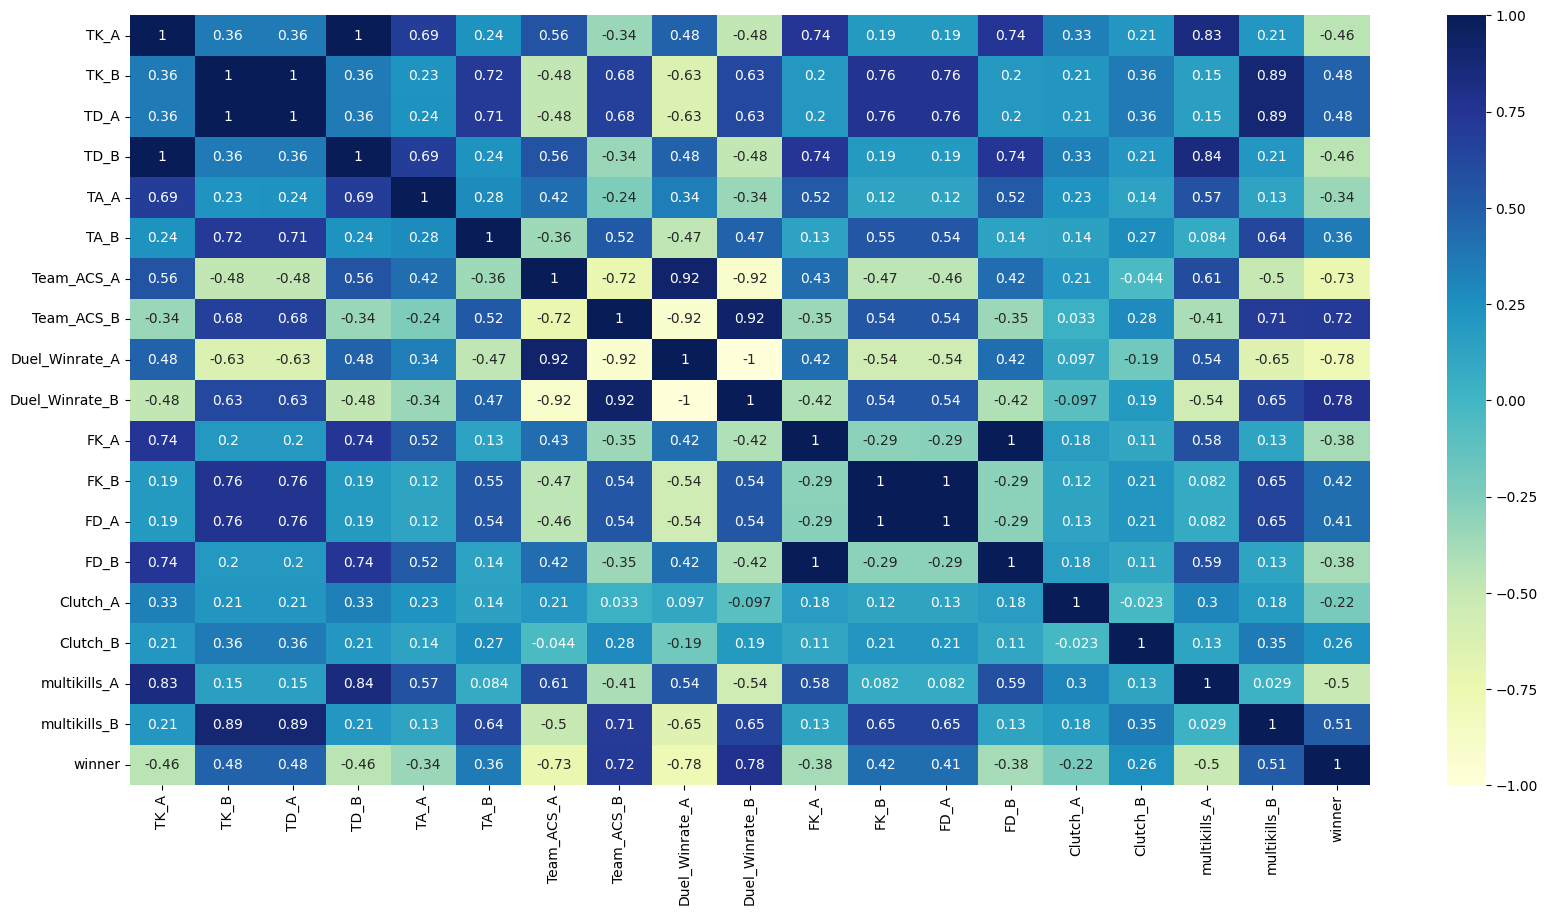

In [ ]:
temp_df = df.iloc[:,263:]
plt.figure(figsize=(20,10))
sns.heatmap(temp_df.corr(), annot=True, cmap="YlGnBu")

In [ ]:
def print_heatmaps(temp_df):
  plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
  j=0
  for i in range(1,11):
    plt.subplot(10,1,i)
    tmp = pd.concat([temp_df.iloc[:, 3+j:29+j], temp_df.winner], axis=1)
    sns.heatmap(tmp.corr(), annot=True, cmap="YlGnBu")
    j += 26

In [ ]:
def print_Subplots(temp_df):
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
    for i in range(1,18):
        plt.subplot(4,5,i)
        sns.scatterplot(data=temp_df, x=temp_df.columns[i], y=temp_df.columns[i+1])

plt.rcParams["figure.figsize"] = (25, 100)

In [ ]:
print_heatmaps(df)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print_Subplots(temp_df)

In [ ]:
plt.figure(figsize=(10,200))
for i in range(1,27):
  plt.subplot(26,1,i)
  sns.boxplot(df.iloc[:,4+i:5+i])

# Model Testing

### Train Test Splitting

In [12]:
df.reset_index(drop=True, inplace=True)
df

,Maps,Team_A,Team_B,Player_1A,Agent_1A,Rating_1A,ACS_1A,Kills_1A,Deaths_1A,Assists_1A,...,Duel_Winrate_B,FK_A,FK_B,FD_A,FD_B,Clutch_A,Clutch_B,multikills_A,multikills_B,winner
0,8,197,72,372,15,0.79,208.0,13.0,20.0,6.0,...,0.533333,2.0,2.6,2.6,2.0,0.041667,0.041667,0.791667,0.958333,1
1,0,197,72,372,15,0.98,272.0,20.0,22.0,3.0,...,0.494186,3.0,1.8,1.8,3.0,0.083333,0.041667,0.875000,1.000000,0
2,1,197,72,372,15,0.70,188.0,11.0,17.0,6.0,...,0.604839,1.8,1.8,1.8,1.8,0.000000,0.041667,0.500000,0.916667,1
3,6,197,72,372,15,1.20,268.0,19.0,18.0,5.0,...,0.530488,2.2,2.4,2.4,2.2,0.083333,0.083333,0.833333,0.875000,1
4,0,72,134,121,11,0.77,174.0,17.0,18.0,2.0,...,0.502703,2.2,3.0,3.0,2.2,0.125000,0.000000,0.916667,0.875000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,8,154,262,20,20,0.75,182.0,10.0,14.0,7.0,...,0.605042,1.6,1.8,1.8,1.6,0.041667,0.125000,0.500000,0.791667,1
2810,1,262,247,695,19,1.13,198.0,16.0,14.0,10.0,...,0.540000,1.6,3.0,3.0,1.6,0.041667,0.083333,0.791667,0.958333,1
2811,8,262,247,695,20,0.90,174.0,13.0,17.0,4.0,...,0.508671,2.4,2.4,2.4,2.4,0.083333,0.250000,0.875000,0.750000,1
2812,2,222,262,308,9,1.04,248.0,13.0,14.0,1.0,...,0.610619,1.4,1.8,1.8,1.4,0.000000,0.041667,0.333333,0.750000,1


In [13]:
X = df.drop(['winner'], axis=1)
y = df['winner']

X = X.fillna(0)

print(X)
print(y)

      Maps  Team_A  Team_B  Player_1A  Agent_1A  Rating_1A  ACS_1A  Kills_1A  \
0        8     197      72        372        15       0.79   208.0      13.0   
1        0     197      72        372        15       0.98   272.0      20.0   
2        1     197      72        372        15       0.70   188.0      11.0   
3        6     197      72        372        15       1.20   268.0      19.0   
4        0      72     134        121        11       0.77   174.0      17.0   
...    ...     ...     ...        ...       ...        ...     ...       ...   
2809     8     154     262         20        20       0.75   182.0      10.0   
2810     1     262     247        695        19       1.13   198.0      16.0   
2811     8     262     247        695        20       0.90   174.0      13.0   
2812     2     222     262        308         9       1.04   248.0      13.0   
2813     8     222     262        308        15       1.00   218.0      17.0   

      Deaths_1A  Assists_1A  ...  Duel_

### Splitting in Order

In [14]:
X_train = X.iloc[:2251]
y_train = y[:2251]
X_val = X.iloc[2251:2251+100]
y_val = y[2251:2251+100]
X_test = X.iloc[2251+100:]
y_test = y[2251+100:]

In [15]:
X_train

,Maps,Team_A,Team_B,Player_1A,Agent_1A,Rating_1A,ACS_1A,Kills_1A,Deaths_1A,Assists_1A,...,Duel_Winrate_A,Duel_Winrate_B,FK_A,FK_B,FD_A,FD_B,Clutch_A,Clutch_B,multikills_A,multikills_B
0,8,197,72,372,15,0.79,208.0,13.0,20.0,6.0,...,0.466667,0.533333,2.0,2.6,2.6,2.0,0.041667,0.041667,0.791667,0.958333
1,0,197,72,372,15,0.98,272.0,20.0,22.0,3.0,...,0.505814,0.494186,3.0,1.8,1.8,3.0,0.083333,0.041667,0.875000,1.000000
2,1,197,72,372,15,0.70,188.0,11.0,17.0,6.0,...,0.395161,0.604839,1.8,1.8,1.8,1.8,0.000000,0.041667,0.500000,0.916667
3,6,197,72,372,15,1.20,268.0,19.0,18.0,5.0,...,0.469512,0.530488,2.2,2.4,2.4,2.2,0.083333,0.083333,0.833333,0.875000
4,0,72,134,121,11,0.77,174.0,17.0,18.0,2.0,...,0.497297,0.502703,2.2,3.0,3.0,2.2,0.125000,0.000000,0.916667,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246,8,262,81,85,15,0.90,185.0,12.0,16.0,6.0,...,0.432624,0.567376,1.4,2.6,2.6,1.4,0.041667,0.083333,0.583333,0.875000
2247,2,77,91,354,9,1.07,228.0,18.0,20.0,7.0,...,0.459119,0.540881,2.2,2.6,2.6,2.2,0.041667,0.041667,0.750000,0.916667
2248,3,77,91,354,12,0.86,204.0,11.0,13.0,0.0,...,0.333333,0.666667,1.2,1.6,1.6,1.2,0.000000,0.083333,0.291667,0.791667
2249,8,91,254,675,4,0.82,133.0,10.0,13.0,2.0,...,0.525316,0.474684,2.4,2.2,2.2,2.4,0.083333,0.041667,0.750000,0.666667


In [16]:
X_val.reset_index(inplace=True, drop=True)
X_val

,Maps,Team_A,Team_B,Player_1A,Agent_1A,Rating_1A,ACS_1A,Kills_1A,Deaths_1A,Assists_1A,...,Duel_Winrate_A,Duel_Winrate_B,FK_A,FK_B,FD_A,FD_B,Clutch_A,Clutch_B,multikills_A,multikills_B
0,1,43,81,41,15,1.02,207.0,16.0,16.0,2.0,...,0.452229,0.547771,1.8,2.6,2.6,1.8,0.125000,0.083333,0.750000,0.833333
1,4,43,81,41,15,0.76,186.0,15.0,21.0,6.0,...,0.473684,0.526316,2.4,2.4,2.4,2.4,0.083333,0.083333,0.791667,0.875000
2,2,43,81,41,9,0.72,180.0,12.0,17.0,2.0,...,0.397059,0.602941,1.2,2.6,2.6,1.2,0.041667,0.041667,0.541667,0.833333
3,1,77,7,354,9,1.11,240.0,16.0,14.0,5.0,...,0.562500,0.437500,2.0,2.0,2.0,2.0,0.041667,0.083333,0.833333,0.666667
4,0,77,7,354,9,1.10,251.0,19.0,17.0,4.0,...,0.432432,0.567568,1.6,2.6,2.6,1.6,0.000000,0.041667,0.500000,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,217,41,35,11,0.67,128.0,11.0,18.0,2.0,...,0.459302,0.540698,1.8,3.0,3.0,1.8,0.083333,0.000000,0.708333,0.833333
96,7,217,41,35,11,0.83,124.0,9.0,12.0,4.0,...,0.550336,0.449664,3.0,1.4,1.4,3.0,0.125000,0.041667,0.750000,0.666667
97,3,217,41,35,11,1.07,192.0,14.0,12.0,4.0,...,0.587786,0.412214,2.4,1.4,1.4,2.4,0.041667,0.041667,0.750000,0.375000
98,6,258,237,87,13,0.93,217.0,12.0,15.0,4.0,...,0.373913,0.626087,0.8,2.6,2.6,0.8,0.000000,0.125000,0.291667,0.750000


In [17]:
X_test.reset_index(inplace=True, drop=True)
X_test

,Maps,Team_A,Team_B,Player_1A,Agent_1A,Rating_1A,ACS_1A,Kills_1A,Deaths_1A,Assists_1A,...,Duel_Winrate_A,Duel_Winrate_B,FK_A,FK_B,FD_A,FD_B,Clutch_A,Clutch_B,multikills_A,multikills_B
0,8,20,33,450,9,0.97,246.0,18.0,17.0,5.0,...,0.443709,0.556291,1.8,2.4,2.4,1.8,0.083333,0.125000,0.666667,0.916667
1,3,20,33,450,9,1.66,312.0,21.0,8.0,3.0,...,0.613208,0.386792,1.6,1.6,1.6,1.6,0.166667,0.000000,0.708333,0.375000
2,1,20,33,450,9,0.90,229.0,14.0,15.0,0.0,...,0.411290,0.588710,1.4,2.0,2.0,1.4,0.000000,0.125000,0.500000,0.833333
3,7,217,74,35,11,0.67,112.0,7.0,15.0,2.0,...,0.465278,0.534722,1.8,2.6,2.6,1.8,0.000000,0.083333,0.708333,0.875000
4,4,217,74,35,11,1.16,260.0,20.0,15.0,7.0,...,0.537037,0.462963,3.0,1.6,1.6,3.0,0.041667,0.083333,0.875000,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,8,154,262,20,20,0.75,182.0,10.0,14.0,7.0,...,0.394958,0.605042,1.6,1.8,1.8,1.6,0.041667,0.125000,0.500000,0.791667
459,1,262,247,695,19,1.13,198.0,16.0,14.0,10.0,...,0.460000,0.540000,1.6,3.0,3.0,1.6,0.041667,0.083333,0.791667,0.958333
460,8,262,247,695,20,0.90,174.0,13.0,17.0,4.0,...,0.491329,0.508671,2.4,2.4,2.4,2.4,0.083333,0.250000,0.875000,0.750000
461,2,222,262,308,9,1.04,248.0,13.0,14.0,1.0,...,0.389381,0.610619,1.4,1.8,1.8,1.4,0.000000,0.041667,0.333333,0.750000


## Logistic Regression

In [18]:
def LR_model(X_train, X_test, y_train, y_test):
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)
    cm7 = confusion_matrix(y_test, y_predict)

    fig, ax = plot_confusion_matrix(conf_mat=cm7, figsize=(6, 6), cmap=plt.cm.Greens)
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()


    accuracy = accuracy_score(y_test,y_predict)
    precision = precision_score(y_test,y_predict)
    recall = recall_score(y_test,y_predict)
    f1 = f1_score(y_test,y_predict)
    auc = roc_auc_score(y_test, y_predict)
    log = log_loss(y_test, y_predict)
    print(f"The Accuracy: {accuracy}")
    print(f"The Precision: {precision}")
    print(f"The Recall: {recall}")
    print(f"The F1-Score: {f1}")
    print(f"The AUC Score: {auc}")
    print(f"The Log Loss: {log}")

    return model

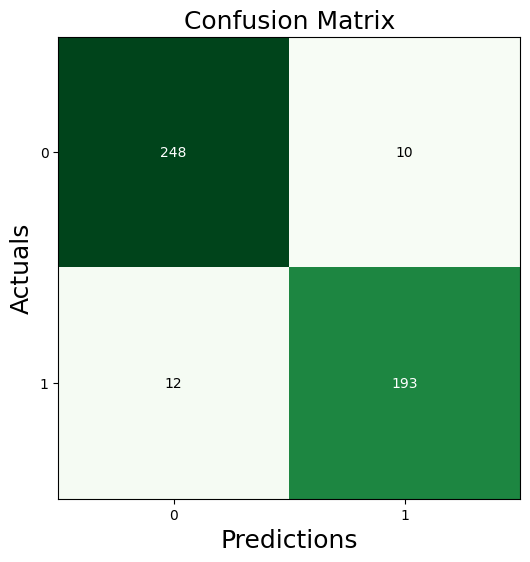

The Accuracy: 0.9524838012958964
The Precision: 0.9507389162561576
The Recall: 0.9414634146341463
The F1-Score: 0.9460784313725491
The AUC Score: 0.9513518623558328
The Log Loss: 1.7126573964591303


In [19]:
classifier_LR = LR_model(X_train, X_test, y_train, y_test)

In [ ]:
parameters_lr = [{'penalty':['l1','l2'],'C': [0.01, 0.1, 1, 10, 100]}]
grid_search_lr = GridSearchCV(estimator = classifier_LR,
                           param_grid = parameters_lr,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search_lr.fit(X_train, y_train)

best_accuracy_lr = grid_search_lr.best_score_
best_paramaeter_lr = grid_search_lr.best_params_
print("Best Accuracy of LR: {:.2f} %".format(best_accuracy_lr.mean()*100))
print("Best Parameter of LR:", best_paramaeter_lr)

## K-Nearest Neighbour Classifier

In [20]:
def getKNN(X_train, X_test, y_train, y_test):
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)
    cm7 = confusion_matrix(y_test, y_predict)

    fig, ax = plot_confusion_matrix(conf_mat=cm7, figsize=(6, 6), cmap=plt.cm.Greens)
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()


    accuracy = accuracy_score(y_test,y_predict)
    precision = precision_score(y_test,y_predict)
    recall = recall_score(y_test,y_predict)
    f1 = f1_score(y_test,y_predict)
    auc = roc_auc_score(y_test, y_predict)
    log = log_loss(y_test, y_predict)
    print(f"The Accuracy: {accuracy}")
    print(f"The Precision: {precision}")
    print(f"The Recall: {recall}")
    print(f"The F1-Score: {f1}")
    print(f"The AUC Score: {auc}")
    print(f"The Log Loss: {log}")
    return model

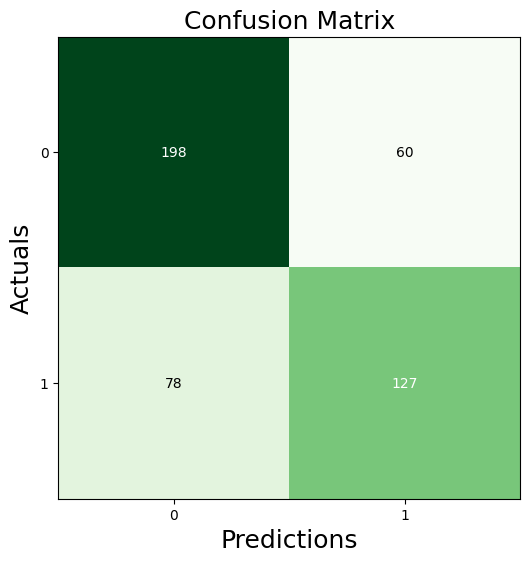

The Accuracy: 0.7019438444924406
The Precision: 0.679144385026738
The Recall: 0.6195121951219512
The F1-Score: 0.6479591836734694
The AUC Score: 0.6934770277935338
The Log Loss: 10.743032759607274


In [21]:
knn = getKNN(X_train, X_test, y_train, y_test)

In [69]:
param_grid_knn = {
    'n_neighbors': list(range(263,284)),
    'algorithm': ['brute', 'kd_tree'],
    'weights': ['uniform', 'distance', 'inverse'],
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}
grid_search_knn = GridSearchCV(estimator = knn,
                           param_grid = param_grid_knn,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search_knn.fit(X_train, y_train)

best_accuracy_knn = grid_search_knn.best_score_
best_paramaeter_knn = grid_search_knn.best_params_
print("Best Accuracy of LR: {:.2f} %".format(best_accuracy_knn.mean()*100))
print("Best Parameter of LR:", best_paramaeter_knn)

KeyboardInterrupt: ignored

## Random Forest

In [22]:
def getForest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)
    cm7 = confusion_matrix(y_test, y_predict)

    fig, ax = plot_confusion_matrix(conf_mat=cm7, figsize=(6, 6), cmap=plt.cm.Greens)
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()


    accuracy = accuracy_score(y_test,y_predict)
    precision = precision_score(y_test,y_predict)
    recall = recall_score(y_test,y_predict)
    f1 = f1_score(y_test,y_predict)
    auc = roc_auc_score(y_test, y_predict)
    log = log_loss(y_test, y_predict)
    print(f"The Accuracy: {accuracy}")
    print(f"The Precision: {precision}")
    print(f"The Recall: {recall}")
    print(f"The F1-Score: {f1}")
    print(f"The AUC Score: {auc}")
    print(f"The Log Loss: {log}")

    return model

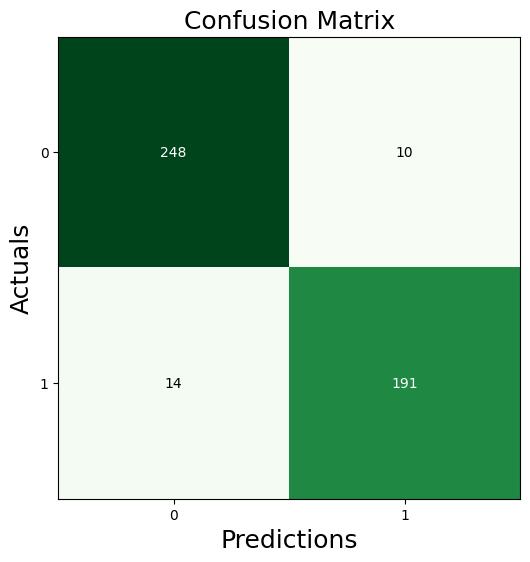

The Accuracy: 0.9481641468682506
The Precision: 0.9502487562189055
The Recall: 0.9317073170731708
The F1-Score: 0.9408866995073892
The AUC Score: 0.9464738135753451
The Log Loss: 1.8683535234099604


In [23]:
forest = getForest(X_train, X_test, y_train, y_test)

In [ ]:
param_grid_forest = {
    'n_estimators': range(10, 101,2),
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

grid_search_forest = GridSearchCV(estimator = forest,
                           param_grid = param_grid_forest,
                           scoring = 'accuracy')
grid_search_forest.fit(X_train, y_train)

best_accuracy_forest = grid_search_forest.best_score_
best_paramaeter_forest = grid_search_forest.best_params_
print("Best Accuracy of LR: {:.2f} %".format(best_accuracy_forest.mean()*100))
print("Best Parameter of LR:", best_paramaeter_forest)

# Neural Network Models

## Simple Neural Network

In [24]:
def getSimpleNeural(X_train, X_test, y_train, y_test, X_val, y_val):
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(281,)))
    model.add(keras.layers.Dense(282, activation="relu"))
    model.add(keras.layers.Dense(200, activation="relu"))
    model.add(keras.layers.Dense(150, activation="relu"))
    model.add(keras.layers.Dense(100, activation="relu"))
    model.add(keras.layers.Dense(50, activation="relu"))
    model.add(keras.layers.Dense(1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val))
    return model, history

In [25]:
def getResult(model, X_test, y_test):
    y_predict1 = (model.predict(X_test) > 0.5).astype("int32")
    y_predict2 = (model.predict(X_test))

    cm7 = confusion_matrix(y_test, y_predict1)

    fig, ax = plot_confusion_matrix(conf_mat=cm7, figsize=(6, 6), cmap=plt.cm.Greens)
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

    accuracy = accuracy_score(y_test, y_predict1)
    precision = precision_score(y_test,y_predict1)
    recall = recall_score(y_test,y_predict1)
    f1 = f1_score(y_test,y_predict1)
    auc = roc_auc_score(y_test, y_predict2)
    log = log_loss(y_test, y_predict2)
    print(f"The Accuracy: {accuracy}")
    print(f"The Precision: {precision}")
    print(f"The Recall: {recall}")
    print(f"The F1-Score: {f1}")
    print(f"The AUC Score: {auc}")
    print(f"The Log Loss: {log}")

def plot_history(history):
    acc = history.history["accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    val_accuracy = history.history["val_accuracy"]

    x = range(1, len(acc) + 1)

    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, "b", label="traning_acc")
    plt.plot(x, val_accuracy, "r", label="validation_acc")
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x, loss, "b", label="traning_loss")
    plt.plot(x, val_loss, "r", label="validation_loss")
    plt.title("Loss")
    plt.legend()

In [ ]:
snn_model, snn_history = getSimpleNeural(X_train, X_test, y_train, y_test, X_val, y_val)

Epoch 1/200
71/71 [==============================] - 7s 7ms/step - loss: 2.6262 - accuracy: 0.6593 - val_loss: 0.3701 - val_accuracy: 0.8000
Epoch 2/200
71/71 [==============================] - 0s 4ms/step - loss: 0.3818 - accuracy: 0.8427 - val_loss: 0.5108 - val_accuracy: 0.7800
Epoch 3/200
71/71 [==============================] - 0s 4ms/step - loss: 0.3814 - accuracy: 0.8436 - val_loss: 0.2324 - val_accuracy: 0.8700
Epoch 4/200
71/71 [==============================] - 0s 5ms/step - loss: 0.3437 - accuracy: 0.8618 - val_loss: 0.3391 - val_accuracy: 0.8700
Epoch 5/200
71/71 [==============================] - 0s 5ms/step - loss: 0.2695 - accuracy: 0.8885 - val_loss: 0.2041 - val_accuracy: 0.9100
Epoch 6/200
71/71 [==============================] - 0s 4ms/step - loss: 0.2362 - accuracy: 0.9014 - val_loss: 0.3516 - val_accuracy: 0.8400
Epoch 7/200
71/71 [==============================] - 0s 5ms/step - loss: 0.2225 - accuracy: 0.9005 - val_loss: 0.1937 - val_accuracy: 0.9300
Epoch 8/200
7

In [27]:
snn_model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 3ms/step - loss: 0.3036 - accuracy: 0.9374


[0.30357590317726135, 0.9373649954795837]

15/15 [==============================] - 0s 2ms/step


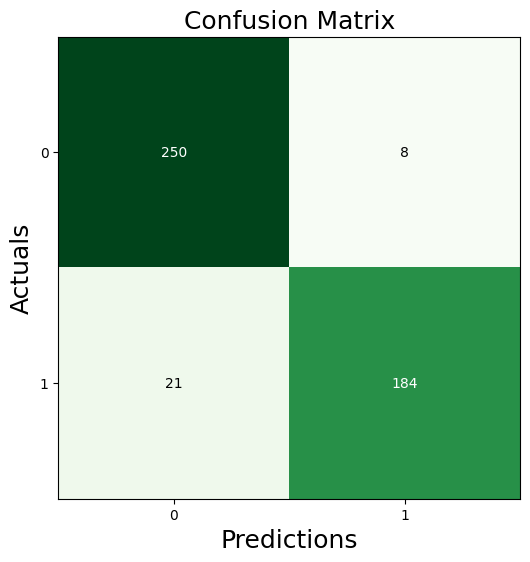

The Accuracy: 0.937365010799136
The Precision: 0.9583333333333334
The Recall: 0.8975609756097561
The F1-Score: 0.9269521410579346
The AUC Score: 0.9850822461712989
The Log Loss: 0.29129615949512805


In [28]:
getResult(snn_model, X_test, y_test)

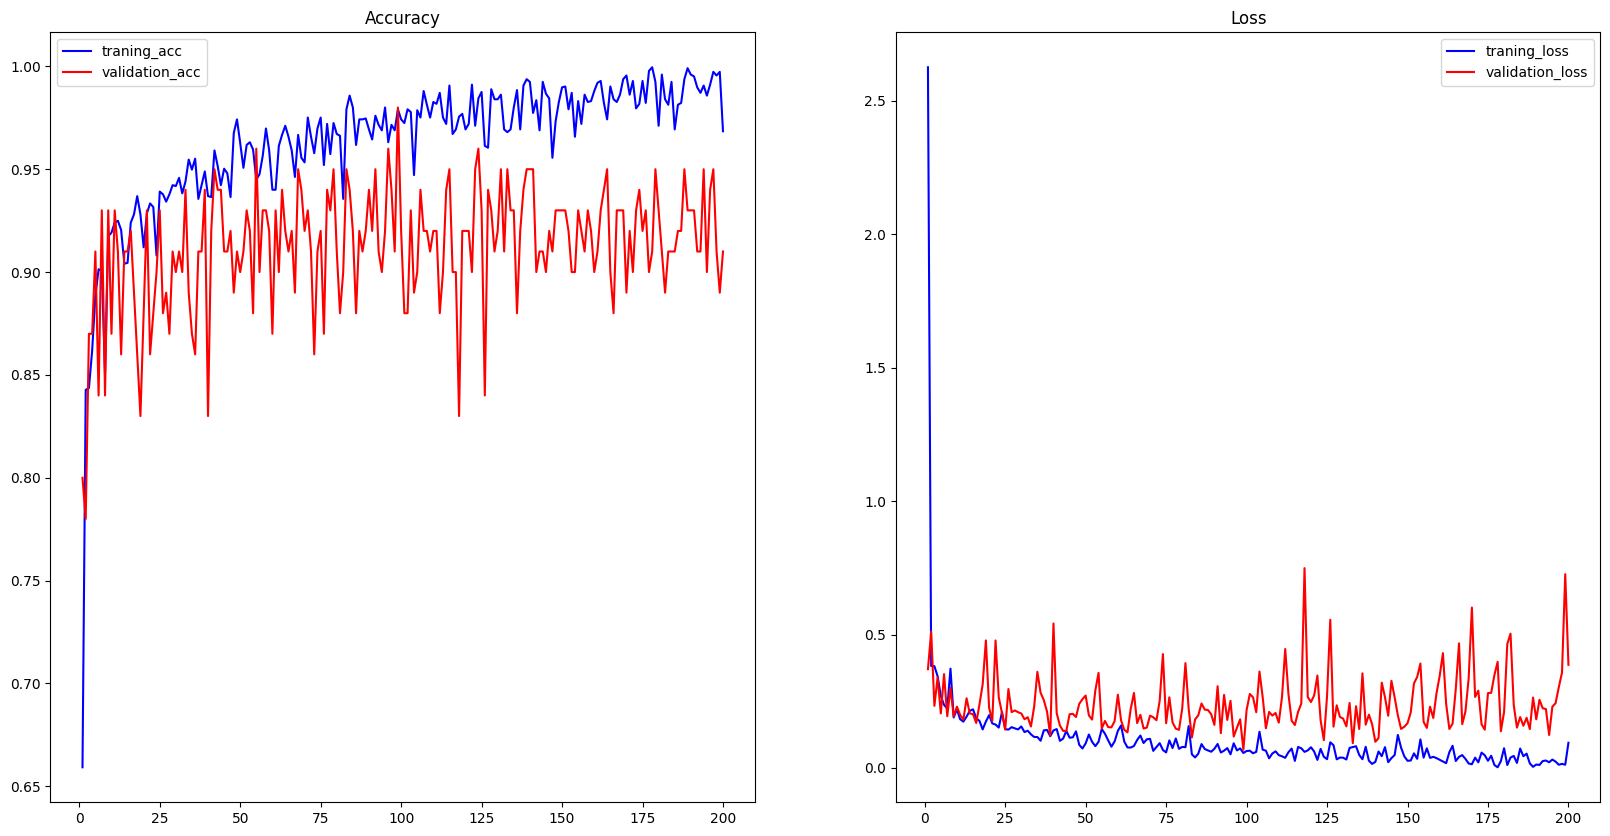

In [ ]:
plot_history(snn_history)

In [ ]:
snn_model.save('/content/drive/MyDrive/ColabNotebooks/snn_model', save_format="h5")

In [26]:
snn_model = tf.keras.models.load_model('/content/drive/MyDrive/ColabNotebooks/snn_model')

## Long Short Term Memory

In [28]:
def getLSTM(X_train, X_test, y_train, y_test, X_val, y_val):
    model = keras.models.Sequential()
    model.add(keras.layers.LSTM(281,input_shape=(281,1)))
    model.add(keras.layers.Dense(281, activation="relu"))
    model.add(keras.layers.Dense(256, activation="relu"))
    model.add(keras.layers.Dense(128, activation="relu"))
    model.add(keras.layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dense(32, activation="relu"))
    model.add(keras.layers.Dense(16, activation="relu"))
    model.add(keras.layers.Dense(8, activation="relu"))
    model.add(keras.layers.Dense(4, activation="relu"))
    model.add(keras.layers.Dense(1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(X_train, y_train, epochs=160, validation_data=(X_val, y_val))
    return model, history

In [ ]:
dnn_model, dnn_history = getLSTM(X_train, X_test, y_train, y_test, X_val, y_val)

Epoch 1/160
71/71 [==============================] - 8s 30ms/step - loss: 0.6913 - accuracy: 0.5411 - val_loss: 0.7052 - val_accuracy: 0.4200
Epoch 2/160
71/71 [==============================] - 1s 21ms/step - loss: 0.6887 - accuracy: 0.5464 - val_loss: 0.6953 - val_accuracy: 0.4200
Epoch 3/160
71/71 [==============================] - 1s 20ms/step - loss: 0.4872 - accuracy: 0.7530 - val_loss: 0.2990 - val_accuracy: 0.9000
Epoch 4/160
71/71 [==============================] - 1s 20ms/step - loss: 0.2721 - accuracy: 0.8858 - val_loss: 0.2117 - val_accuracy: 0.9100
Epoch 5/160
71/71 [==============================] - 1s 20ms/step - loss: 0.2223 - accuracy: 0.9054 - val_loss: 0.2260 - val_accuracy: 0.9000
Epoch 6/160
71/71 [==============================] - 1s 20ms/step - loss: 0.2335 - accuracy: 0.9005 - val_loss: 0.1733 - val_accuracy: 0.9100
Epoch 7/160
71/71 [==============================] - 2s 22ms/step - loss: 0.2065 - accuracy: 0.9125 - val_loss: 0.1792 - val_accuracy: 0.9000
Epoch 

In [30]:
dnn_model.evaluate(X_test, y_test)

15/15 [==============================] - 3s 211ms/step - loss: 0.2443 - accuracy: 0.9611


[0.2443404197692871, 0.9611231088638306]

15/15 [==============================] - 5s 301ms/step


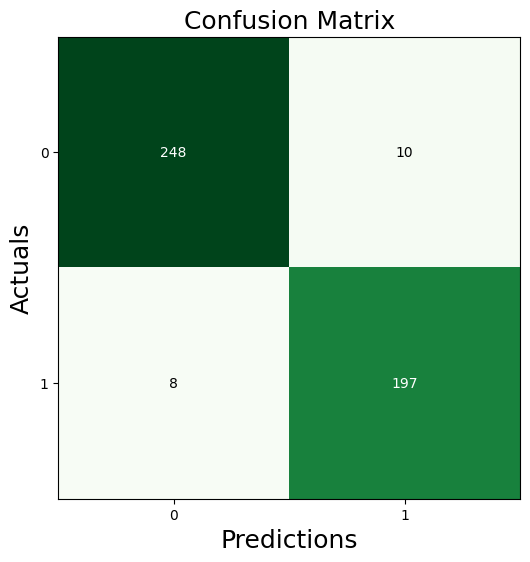

The Accuracy: 0.9611231101511879
The Precision: 0.9516908212560387
The Recall: 0.9609756097560975
The F1-Score: 0.9563106796116505
The AUC Score: 0.9892701833995083
The Log Loss: 0.2443431877725449


In [31]:
getResult(dnn_model, X_test, y_test)

In [ ]:
dnn_model.save('/content/drive/MyDrive/ColabNotebooks/dnn_model', save_format="h5")

In [29]:
dnn_model = tf.keras.models.load_model('/content/drive/MyDrive/ColabNotebooks/dnn_model')
dnn_model.evaluate(X_test, y_test)

15/15 [==============================] - 6s 338ms/step - loss: 0.2443 - accuracy: 0.9611


[0.2443404197692871, 0.9611231088638306]

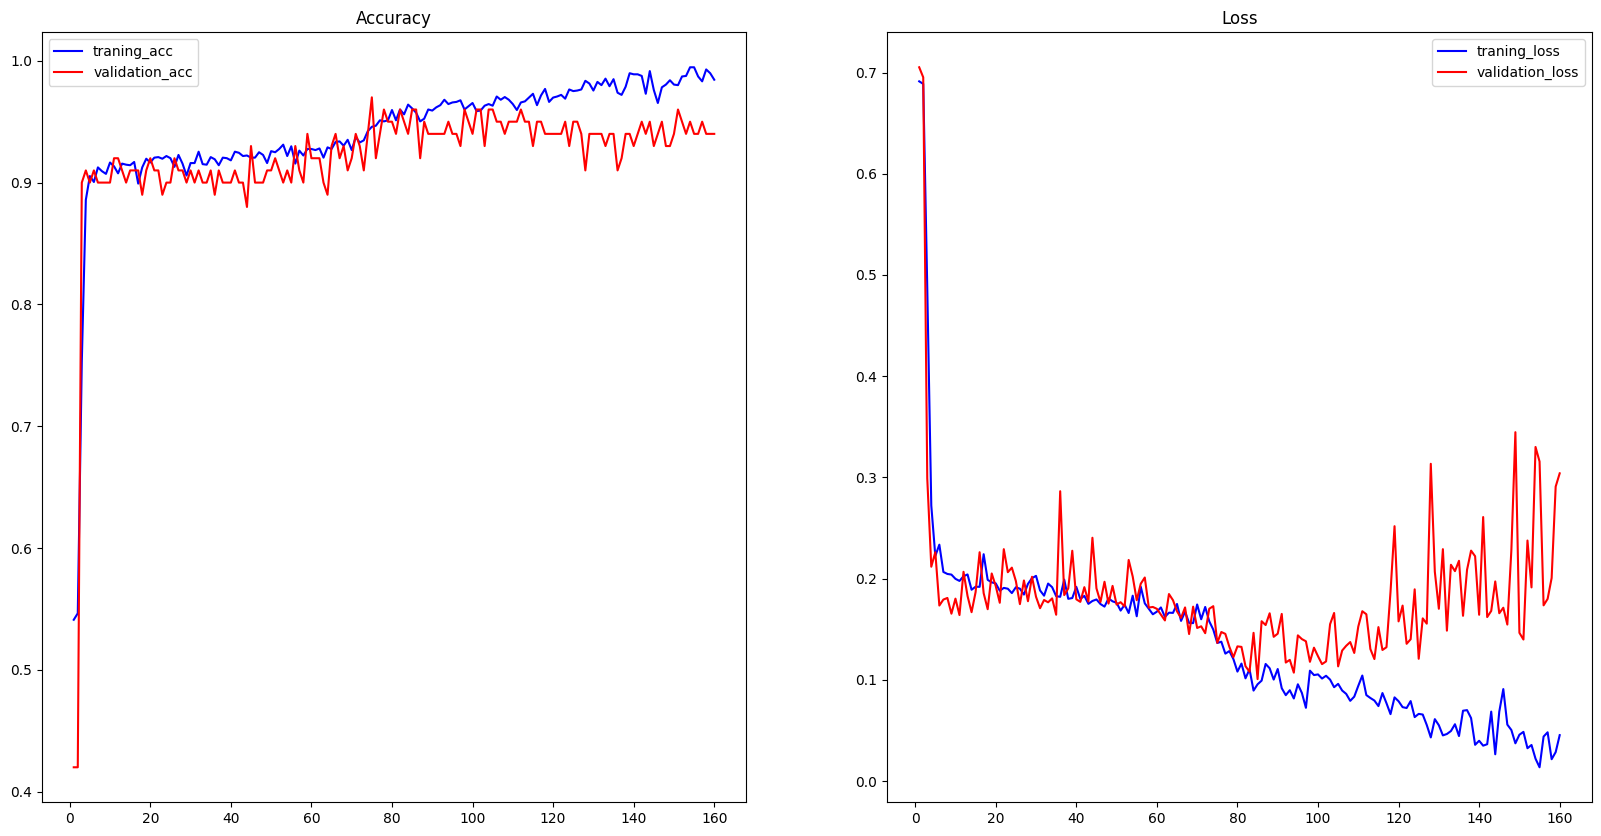

In [ ]:
plot_history(dnn_history)

## Modular Neural Network

In [ ]:
X_train.iloc[:,5+26+26+26:5+26+26+26+26]

,Rating_4A,ACS_4A,Kills_4A,Deaths_4A,Assists_4A,Kills - Deaths_4A,KAST %_4A,ADR_4A,Headshot %_4A,First Kills_4A,...,1v1_4A,1v2_4A,1v3_4A,1v4_4A,1v5_4A,Econ_4A,Plants_4A,Defuses_4A,Player_5A,Agent_5A
0,0.94,171.0,16.0,17.0,5.0,1.0,0.70,109.0,0.36,0.0,...,0,0,0,0,0,43,1,0,1345,9
1,0.60,84.0,6.0,18.0,8.0,12.0,0.58,66.0,0.24,0.0,...,0,0,0,0,0,27,1,0,1345,16
2,0.86,172.0,10.0,14.0,9.0,4.0,0.61,99.0,0.39,0.0,...,0,0,0,0,0,42,3,0,1345,1
3,0.77,182.0,14.0,18.0,7.0,4.0,0.61,124.0,0.29,0.0,...,1,0,0,0,0,51,1,0,1345,9
4,1.10,195.0,16.0,17.0,21.0,1.0,0.85,136.0,0.18,0.0,...,1,0,1,0,0,47,7,1,1104,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246,1.14,238.0,15.0,14.0,6.0,1.0,0.70,161.0,0.24,2.0,...,0,0,1,0,0,74,1,0,1212,17
2247,0.81,101.0,8.0,17.0,6.0,9.0,0.71,88.0,0.23,0.0,...,0,0,0,0,0,36,3,0,1419,20
2248,0.69,203.0,9.0,14.0,5.0,5.0,0.57,138.0,0.26,0.0,...,0,0,0,0,0,55,1,0,1419,2
2249,1.18,259.0,19.0,17.0,8.0,2.0,0.78,180.0,0.17,3.0,...,0,1,0,0,0,65,1,0,918,13


In [32]:
import keras
def create_model():
    model = keras.models.Sequential()
    model.add(keras.layers.LSTM(26, input_shape=(26,1)))
    model.add(keras.layers.Dense(26, activation="relu"))
    model.add(keras.layers.Dense(24, activation="relu"))
    model.add(keras.layers.Dense(18, activation="relu"))
    model.add(keras.layers.Dense(16, activation="relu"))
    model.add(keras.layers.Dense(12, activation="relu"))
    model.add(keras.layers.Dense(8, activation="relu"))
    model.add(keras.layers.Dense(1, activation="sigmoid"))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [33]:
def trainMNN(X_train, X_val, y_train, y_val):
    variables = {}

    for i in range(1, 11):
        var_name = f"model{i}A"
        var_val = create_model()
        variables[var_name] = var_val

    print(variables['model1A'].summary())

    j = 0
    for i in range(1, 11):
        variables[f"model{i}A"].fit(
            X_train.iloc[:, 3+j:29+j], y_train, epochs=200, validation_data = (X_val.iloc[:, 3+j:29+j], y_val))
        j += 26

    return variables

In [34]:
def getDF(variables, df):
    ans = []
    j = 0
    for i in range(1, 11):
        temp = (variables[f"model{i}A"].predict(df.iloc[:,3+j:29+j])>0.5).astype(int)
        # temp = (variables[f"model{i}A"].predict(df.iloc[:, 3+j:29+j]))
        ans.extend(temp)
        j += 26

    cols = ['PI_1A', 'PI_2A', 'PI_3A', 'PI_4A', 'PI_5A',
            'PI_1B', 'PI_2B', 'PI_3B', 'PI_4B', 'PI_5B']
    l = len(df.iloc[:,0])
    ans1 = np.array_split(ans, 10)
    ans1 = np.array(ans1)
    ans1 = np.reshape(ans1, (10, l))
    df_1 = pd.DataFrame(ans1)
    df_1 = df_1.transpose()
    df_1.columns = cols
    return df_1


In [35]:
def getDF1(df_1,  X_train, y_train):

    temp_X_train = X_train.iloc[:, 263:]
    temp_X_train.reset_index(inplace=True, drop=True)
    y_train.reset_index(inplace=True, drop=True)
    temp_df = pd.concat([df_1, temp_X_train], axis=1)
    temp_df['winner'] = y_train
    temp_df = temp_df.fillna(0)

    return temp_df

In [38]:
variables = trainMNN(X_train, X_val, y_train, y_val)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 26)                2912      
                                                                 
 dense (Dense)               (None, 26)                702       
                                                                 
 dense_1 (Dense)             (None, 24)                648       
                                                                 
 dense_2 (Dense)             (None, 18)                450       
                                                                 
 dense_3 (Dense)             (None, 16)                304       
                                                                 
 dense_4 (Dense)             (None, 12)                204       
                                                                 
 dense_5 (Dense)             (None, 8)                 1

In [39]:
with open('/content/drive/MyDrive/ColabNotebooks/saved_dictionary.pkl', 'wb') as f:
    pickle.dump(variables, f)

In [36]:
with open('/content/drive/MyDrive/ColabNotebooks/saved_dictionary.pkl', 'rb') as f:
    model_dict = pickle.load(f)

In [37]:
df_1 = getDF(model_dict, X_train)
df_3 = getDF(model_dict, X_val)
df_2 = getDF(model_dict, X_test)

15/15 [==============================] - 0s 3ms/step


In [38]:
# temp_df, temp_df_1 = getDF1(df_1, df_2, X_train, X_test, y_train, y_test)
temp_df = getDF1(df_1, X_train, y_train)
temp_df1 = getDF1(df_2, X_test, y_test)
temp_df2 = getDF1(df_3, X_val, y_val)

In [39]:
X_train_M = temp_df.drop(['winner'], axis=1)
X_test_M = temp_df1.drop(['winner'], axis=1)
X_val_M = temp_df2.drop(['winner'], axis=1)
y_train_M = temp_df.winner
y_test_M = temp_df1.winner
y_val_M = temp_df2.winner

In [40]:
# X_train_M
# X_test_M
X_val_M

# plt.figure(figsize=(20,10))
# sns.heatmap(X_test_M.corr(), annot=True, cmap="YlGnBu")

,PI_1A,PI_2A,PI_3A,PI_4A,PI_5A,PI_1B,PI_2B,PI_3B,PI_4B,PI_5B,...,Duel_Winrate_A,Duel_Winrate_B,FK_A,FK_B,FD_A,FD_B,Clutch_A,Clutch_B,multikills_A,multikills_B
0,1,1,1,0,1,1,1,1,0,1,...,0.452229,0.547771,1.8,2.6,2.6,1.8,0.125000,0.083333,0.750000,0.833333
1,1,1,1,0,0,0,1,0,1,0,...,0.473684,0.526316,2.4,2.4,2.4,2.4,0.083333,0.083333,0.791667,0.875000
2,1,1,1,1,1,1,0,1,1,1,...,0.397059,0.602941,1.2,2.6,2.6,1.2,0.041667,0.041667,0.541667,0.833333
3,0,1,0,0,0,0,0,0,0,0,...,0.562500,0.437500,2.0,2.0,2.0,2.0,0.041667,0.083333,0.833333,0.666667
4,1,1,1,1,1,1,1,1,1,1,...,0.432432,0.567568,1.6,2.6,2.6,1.6,0.000000,0.041667,0.500000,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,1,1,1,0,0,1,1,0,...,0.459302,0.540698,1.8,3.0,3.0,1.8,0.083333,0.000000,0.708333,0.833333
96,0,0,0,0,0,0,0,0,0,0,...,0.550336,0.449664,3.0,1.4,1.4,3.0,0.125000,0.041667,0.750000,0.666667
97,0,0,0,0,0,0,0,1,0,0,...,0.587786,0.412214,2.4,1.4,1.4,2.4,0.041667,0.041667,0.750000,0.375000
98,1,1,1,1,1,1,1,1,1,1,...,0.373913,0.626087,0.8,2.6,2.6,0.8,0.000000,0.125000,0.291667,0.750000


In [ ]:
def getMNN(X_train, X_val, y_train, y_val):
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(28,)))
    model.add(keras.layers.Dense(400, activation="relu"))
    model.add(keras.layers.Dense(350, activation="relu"))
    model.add(keras.layers.Dense(300, activation="relu"))
    model.add(keras.layers.Dense(250, activation="relu"))
    model.add(keras.layers.Dense(200, activation="relu"))
    model.add(keras.layers.Dense(150, activation="relu"))
    model.add(keras.layers.Dense(100, activation="relu"))
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val))
    return model, history

In [ ]:
mnn_model, mnn_history = getMNN(X_train_M, X_val_M, y_train_M, y_val_M)

Epoch 1/200
71/71 [==============================] - 3s 7ms/step - loss: 0.4545 - accuracy: 0.8299 - val_loss: 0.3978 - val_accuracy: 0.8300
Epoch 2/200
71/71 [==============================] - 0s 5ms/step - loss: 0.1821 - accuracy: 0.9223 - val_loss: 0.1696 - val_accuracy: 0.9100
Epoch 3/200
71/71 [==============================] - 0s 5ms/step - loss: 0.1922 - accuracy: 0.9245 - val_loss: 0.2219 - val_accuracy: 0.9200
Epoch 4/200
71/71 [==============================] - 0s 5ms/step - loss: 0.1946 - accuracy: 0.9187 - val_loss: 0.2135 - val_accuracy: 0.9200
Epoch 5/200
71/71 [==============================] - 0s 5ms/step - loss: 0.1754 - accuracy: 0.9254 - val_loss: 0.1582 - val_accuracy: 0.9000
Epoch 6/200
71/71 [==============================] - 0s 5ms/step - loss: 0.1668 - accuracy: 0.9338 - val_loss: 0.1796 - val_accuracy: 0.9400
Epoch 7/200
71/71 [==============================] - 0s 5ms/step - loss: 0.1544 - accuracy: 0.9409 - val_loss: 0.1635 - val_accuracy: 0.9300
Epoch 8/200
7

In [47]:
mnn_model.evaluate(X_test_M, y_test_M)

15/15 [==============================] - 0s 3ms/step - loss: 0.2408 - accuracy: 0.9158


[0.2408212125301361, 0.915766716003418]

In [ ]:
mnn_model.save('/content/drive/MyDrive/ColabNotebooks/mnn_model', save_format="h5")

In [41]:
mnn_model = tf.keras.models.load_model('/content/drive/MyDrive/ColabNotebooks/mnn_model')
mnn_model.evaluate(X_test_M, y_test_M)

15/15 [==============================] - 0s 3ms/step - loss: 0.2408 - accuracy: 0.9158


[0.24082118272781372, 0.915766716003418]

15/15 [==============================] - 0s 3ms/step


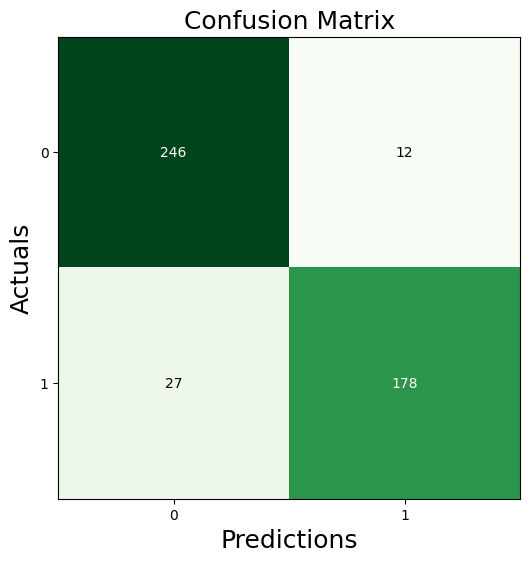

The Accuracy: 0.9157667386609071
The Precision: 0.9368421052631579
The Recall: 0.8682926829268293
The F1-Score: 0.90126582278481
The AUC Score: 0.9850066175080355
The Log Loss: 0.24082133922287596


In [42]:
getResult(mnn_model, X_test_M, y_test_M)

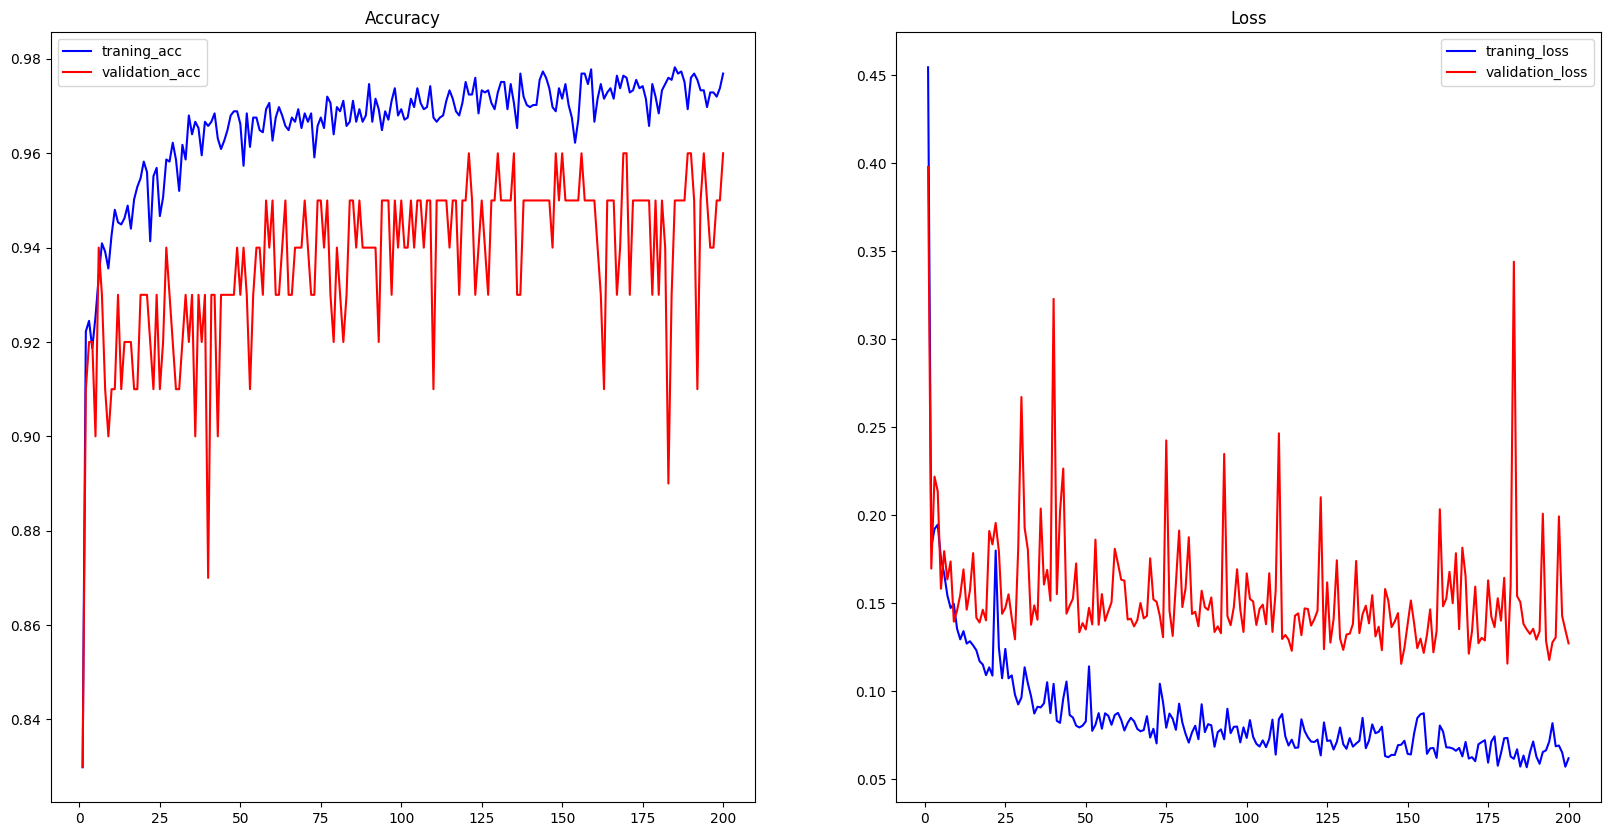

In [ ]:
plot_history(mnn_history)

### ROC CURVE

15/15 [==============================] - 0s 3ms/step


Text(0.5, 0, 'False Positive Rate')

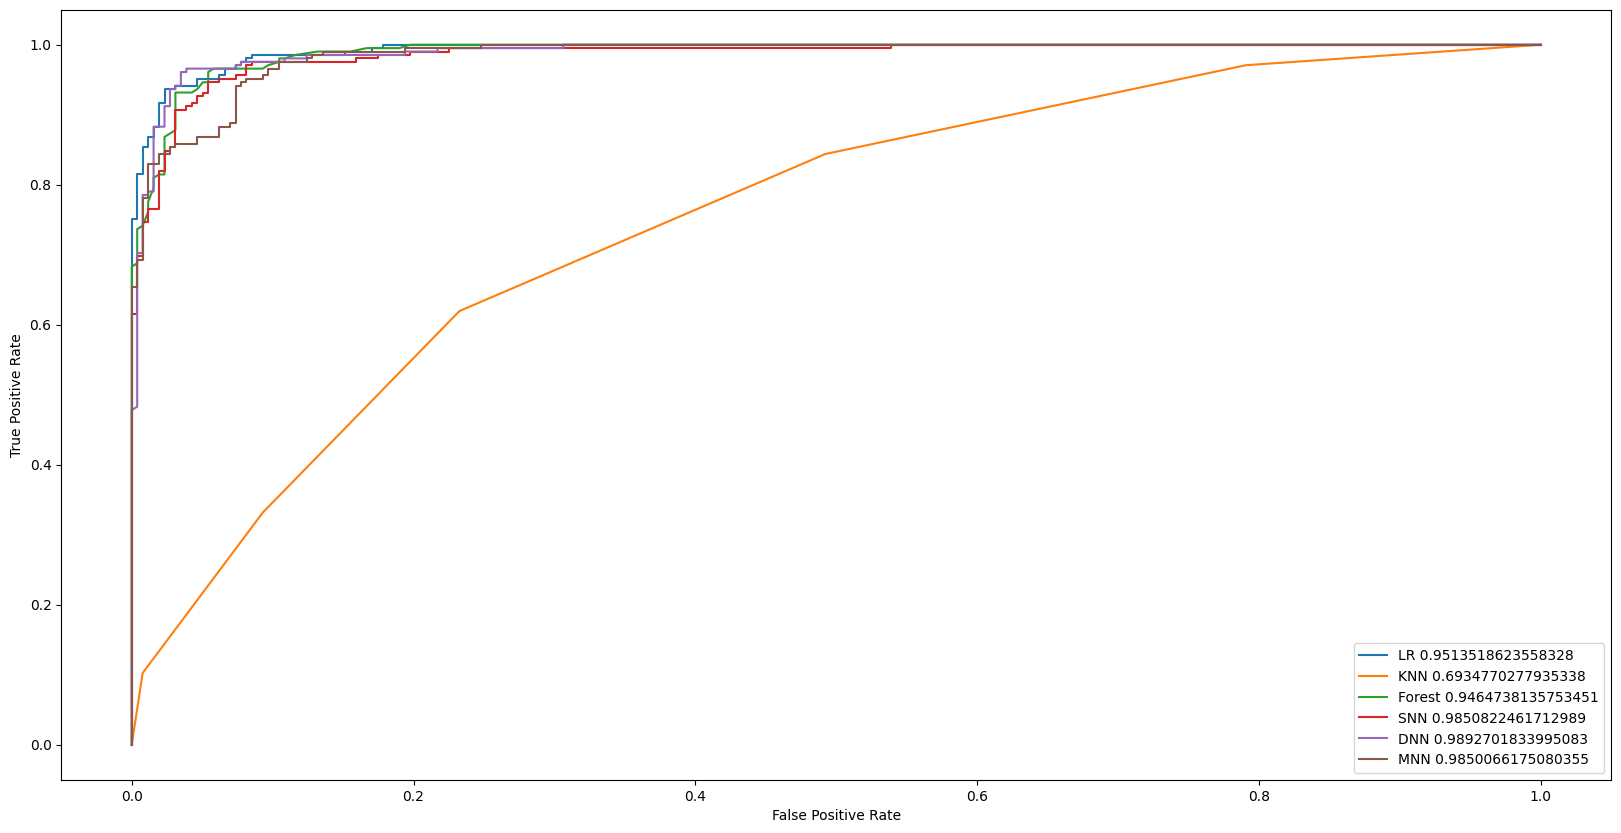

In [43]:
LR_predict = classifier_LR.predict_proba(X_test)[::,1]
KNN_predict = knn.predict_proba(X_test)[::,1]
forest_predict = forest.predict_proba(X_test)[::,1]
snn_predict = snn_model.predict(X_test)
dnn_predict = dnn_model.predict(X_test)
mnn_predict = mnn_model.predict(X_test_M)

lr_score = roc_auc_score(y_test, classifier_LR.predict(X_test))
knn_score = roc_auc_score(y_test, knn.predict(X_test))
forest_score = roc_auc_score(y_test, forest.predict(X_test))
snn_score = roc_auc_score(y_test, snn_model.predict(X_test))
dnn_score = roc_auc_score(y_test, dnn_model.predict(X_test))
mnn_score = roc_auc_score(y_test_M, mnn_model.predict(X_test_M))


fpr_LR, tpr_LR,_ = roc_curve(y_test, LR_predict)
fpr_KNN, tpr_KNN,_ = roc_curve(y_test, KNN_predict)
fpr_forest, tpr_forest,_ = roc_curve(y_test, forest_predict)
fpr_SNN, tpr_SNN,_ = roc_curve(y_test, snn_predict)
fpr_DNN, tpr_DNN,_ = roc_curve(y_test, dnn_predict)
fpr_MNN, tpr_MNN,_ = roc_curve(y_test_M, mnn_predict)

plt.figure(figsize=(20,10))
plt.plot(fpr_LR, tpr_LR)
plt.plot(fpr_KNN, tpr_KNN)
plt.plot(fpr_forest, tpr_forest)
plt.plot(fpr_SNN, tpr_SNN)
plt.plot(fpr_DNN, tpr_DNN)
plt.plot(fpr_MNN, tpr_MNN)

plt.legend([f'LR {lr_score}',f'KNN {knn_score}',f'Forest {forest_score}',f'SNN {snn_score}',f'DNN {dnn_score}',f'MNN {mnn_score}'], loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Team Extraction

In [ ]:
# player_1A = df.groupby('Player_1A')
# player_2A = df.groupby('Player_2A')
# player_3A = df.groupby('Player_3A')
# player_4A = df.groupby('Player_4A')
# player_5A = df.groupby('Player_5A')

# player_1B = df.groupby('Player_1B')
# player_2B = df.groupby('Player_2B')
# player_3B = df.groupby('Player_3B')
# player_4B = df.groupby('Player_4B')
# player_5B = df.groupby('Player_5B')
# team_A = df.groupby('Team_A')
# team_B = df.groupby('Team_B')
# paper_rex_A = team_A.get_group(dict_teams['Sentinels'])
# paper_rex_B = team_B.get_group(dict_teams['Sentinels'])

# player_cols = df.columns[df.columns.str.contains('Player')]
# print(player_cols)

Index(['Player_1A', 'Player_2A', 'Player_3A', 'Player_4A', 'Player_5A',
       'Player_1B', 'Player_2B', 'Player_3B', 'Player_4B', 'Player_5B'],
      dtype='object')


In [ ]:
# prx_players_1 = paper_rex_A.loc[:,player_cols[:5]]
# prx_players_2 = paper_rex_B.loc[:,player_cols[5:]]

# pl_A = []
# pl_B = []
# for i in player_cols[:5]:
#     for j in prx_players_1[i].unique():
#         pl_A.append(j)

# for i in player_cols[5:]:
#     for j in prx_players_2[i].unique():
#         pl_B.append(j)

# pl = pl_A + pl_B
# pl = set(pl)
# print(pl)

# # pl = ['MaxC ']
# # pl = [player[0]]
# pl = ['Jinggg ', 'Kanpeki ','shroud ','Zellsis ', 'dapr ','Jinggg ', 'Kanpeki ','shroud ','Zellsis ', 'dapr ']
# agents = ['Raze','Skye','Astra','Kayo','Killjoy','Raze','Skye','Astra','Kayo','Killjoy']

# print(pl)

In [44]:
player_cols = df.columns[df.columns.str.contains('Player')]

In [45]:
def getPlayers():
  pl = []
  for i in range(5):
    val = input(f"Player {i+1}A: ")
    val = val + " "
    pl.append(val)

  for i in range(5):
    val = input(f"Player {i+1}B: ")
    val = val + " "
    pl.append(val)

  return pl


def getAgents():
  pl = []
  for i in range(5):
    val = input(f"Agent {i+1}A: ")
    pl.append(val)

  for i in range(5):
    val = input(f"Agent {i+1}B: ")
    pl.append(val)

  return pl

In [46]:
maps = input("Enter the map: ")
team_A_name = input('Enter the name of Team A: ')
team_B_name = input('Enter the name of Team B: ')

input_players = getPlayers()
input_agents = getAgents()

Enter the map: Haven
Enter the name of Team A: Sentinels
Enter the name of Team B: Evil Geniuses
Player 1A: TenZ
Player 2A: Sacy
Player 3A: zekken
Player 4A: Zellsis
Player 5A: johnqt
Player 1B: Demon1
Player 2B: jawgemo
Player 3B: Boostio
Player 4B: C0M
Player 5B: Ethan
Agent 1A: Reyna
Agent 2A: Sova
Agent 3A: Jett
Agent 4A: Omen
Agent 5A: Killjoy
Agent 1B: Raze
Agent 2B: Jett
Agent 3B: Omen
Agent 4B: Killjoy
Agent 5B: Skye


In [47]:
pl_1 = []
for i in input_players:
  pl_1.append(dict_players[i])

agents_1 = []
for i in input_agents:
  agents_1.append(dict_agents[i])

maps = dict_maps[maps]
team_a = dict_teams[team_A_name]
team_b = dict_teams[team_B_name]

In [48]:
print(maps)
print(team_a)
print(team_b)
print(agents_1)
print(pl_1)

4
224
72
[16, 19, 9, 13, 11, 15, 9, 13, 11, 18]
[767, 678, 1459, 871, 1113, 197, 1104, 121, 134, 245]


In [49]:
x = []
j=5

for i in range(11):
    x.append(j)
    j += 26

print(x)

def getPlayerDf_A(pl):
    temp_arr = []
    for i in range(len(pl)):
        temp_pd = pd.DataFrame([])
        for j in range(len(player_cols)):
            try:
                temp = df.groupby(player_cols[j]).get_group(pl[i]).iloc[:,x[j]:x[j+1]]
                temp.columns = df.columns[x[i]:x[i+1]]
                temp_pd = pd.concat([temp, temp_pd])
            except:
                continue
        temp_arr.append(temp_pd)
    return temp_arr

[5, 31, 57, 83, 109, 135, 161, 187, 213, 239, 265]


In [50]:
arr = getPlayerDf_A(pl_1)

In [51]:
arr

[      Rating_1A  ACS_1A  Kills_1A  Deaths_1A  Assists_1A  Kills - Deaths_1A  \
 100        0.43   159.0      13.0       21.0         4.0                8.0   
 101        0.88   227.0      17.0       20.0         2.0                3.0   
 564        0.13    58.0       2.0       15.0         3.0               13.0   
 565        0.56   146.0       9.0       19.0         5.0               10.0   
 1730       1.29   312.0      26.0       17.0         3.0                9.0   
 ...         ...     ...       ...        ...         ...                ...   
 1624       0.84   220.0      13.0       17.0        13.0                4.0   
 1636       1.26   251.0      16.0       15.0        25.0                1.0   
 1637       1.94   386.0      32.0        8.0         5.0               24.0   
 1664       1.16   191.0      16.0       12.0         5.0                4.0   
 1665       0.98   210.0      25.0       19.0         1.0                6.0   
 
       KAST %_1A  ADR_1A  Headshot %_1

In [52]:
def forecast_model(arr):
    l = len(arr)
    model = ARIMA(arr, order=(0,0,2))
    result = model.fit()
    forecasts = result.predict(start=l,end=l,dynamic=True)
    return forecasts

def get_player_forecast(df):
    # l = len(df)
    val = []
    for i in range(2,26):
        temp = float(forecast_model(df.iloc[:,i:i+1]))
        if (temp > 0.5 and temp < 1):
            temp = 1
        elif (temp < 0.5):
            temp = 0
        val.append(temp)
    return val

In [ ]:
# print(get_player_forecast(arr[1]))

[17.569158255704814, 14.703400262331046, 5.051129567071106, 5.577949221932744, 1, 155.16094248319143, 0, 3.1916635536970737, 2.9403576124038087, 2.266618556769507, 2.9381141442463194, 1, 0, 0, 0, 0, 0, 0, 0, 62.3455002141243, 1, 0, 32.37040513230579, 22.226224564123967]


In [53]:
stats = []
for i in arr:
    stats.append(get_player_forecast(i))

np.set_printoptions(formatter={'float_kind':'{:f}'.format})
stats1 = np.array(stats)
print(stats1)

[[17.918746 14.643637 4.236964 6.027209 1.000000 147.345562 0.000000
  3.684751 3.064107 2.456948 3.131548 1.233570 0.000000 0.000000 0.000000
  0.000000 0.000000 0.000000 0.000000 59.083239 1.000000 0.000000
  926.521853 11.793814]
 [14.108030 13.050040 7.737474 4.530485 1.000000 123.967034 0.000000
  1.596322 1.220880 1.267194 2.462280 1.000000 0.000000 0.000000 0.000000
  0.000000 0.000000 0.000000 0.000000 52.297750 2.346213 1.000000
  812.665829 10.456659]
 [17.569158 14.703400 5.051130 5.577949 1.000000 155.160942 0.000000
  3.191664 2.940358 2.266619 2.938114 1.000000 0.000000 0.000000 0.000000
  0.000000 0.000000 0.000000 0.000000 62.345500 1.000000 0.000000
  32.370304 22.226225]
 [14.074818 14.381207 4.201796 3.947642 1.000000 135.711683 0.000000
  1.717517 2.814935 1.057480 2.591913 1.000000 0.000000 0.000000 0.000000
  0.000000 0.000000 0.000000 0.000000 56.331590 2.390995 1.000000
  1060.195423 10.412464]
 [13.246518 12.457077 5.864372 4.229274 1.000000 127.016723 0.000000

In [54]:
pl_data = []

for i in range(10):
    pl_data.append(pl_1[i])
    pl_data.append(agents_1[i])

pl_data = np.array_split(pl_data, 10)
pl_data1 = []
for i in range(10):
    temp = list(pl_data[i])
    temp.extend(stats1[i])
    pl_data1.append(temp)

pl_data1 = np.array(pl_data1).flatten()
pl_data1 = np.insert(pl_data1, 0, maps)
pl_data1 = np.insert(pl_data1, 1, team_a)
pl_data1 = np.insert(pl_data1, 2, team_b)

pl_dataframe = pd.DataFrame(pl_data1)
pl_dataframe = pl_dataframe.transpose()

In [55]:
cols = df.columns[:263]
print(cols)

Index(['Maps', 'Team_A', 'Team_B', 'Player_1A', 'Agent_1A', 'Rating_1A',
       'ACS_1A', 'Kills_1A', 'Deaths_1A', 'Assists_1A',
       ...
       '4k_5B', '5k_5B', '1v1_5B', '1v2_5B', '1v3_5B', '1v4_5B', '1v5_5B',
       'Econ_5B', 'Plants_5B', 'Defuses_5B'],
      dtype='object', length=263)


In [56]:
pl_dataframe.columns = cols

In [57]:
pl_dataframe

,Maps,Team_A,Team_B,Player_1A,Agent_1A,Rating_1A,ACS_1A,Kills_1A,Deaths_1A,Assists_1A,...,4k_5B,5k_5B,1v1_5B,1v2_5B,1v3_5B,1v4_5B,1v5_5B,Econ_5B,Plants_5B,Defuses_5B
0,4.0,224.0,72.0,767.0,16.0,17.918746,14.643637,4.236964,6.027209,1.0,...,0.0,0.0,0.0,0.0,0.0,46.295479,3.075046,1.0,1051.265265,12.171892


In [58]:
questionDF = apply(pl_dataframe)
questionDF

,Maps,Team_A,Team_B,Player_1A,Agent_1A,Rating_1A,ACS_1A,Kills_1A,Deaths_1A,Assists_1A,...,Duel_Winrate_A,Duel_Winrate_B,FK_A,FK_B,FD_A,FD_B,Clutch_A,Clutch_B,multikills_A,multikills_B
0,4.0,224.0,72.0,767.0,16.0,17.918746,14.643637,4.236964,6.027209,1.0,...,0.464988,0.535012,1.681589,1.769378,2.667675,2.783168,12.235851,11.923913,0.0,0.0


In [67]:
qdf = getDF(model_dict, questionDF)
temp_qdf = questionDF.iloc[:, 263:]
temp_qdf = pd.concat([qdf, temp_qdf], axis=1)
temp_qdf

1/1 [==============================] - 0s 37ms/step


,PI_1A,PI_2A,PI_3A,PI_4A,PI_5A,PI_1B,PI_2B,PI_3B,PI_4B,PI_5B,...,Duel_Winrate_A,Duel_Winrate_B,FK_A,FK_B,FD_A,FD_B,Clutch_A,Clutch_B,multikills_A,multikills_B
0,0,0,0,0,0,1,1,0,1,1,...,0.464988,0.535012,1.681589,1.769378,2.667675,2.783168,12.235851,11.923913,0.0,0.0


In [68]:
print(classifier_LR.predict(questionDF))
print(knn.predict(questionDF))
print(forest.predict(questionDF))
print(snn_model.predict(questionDF))
print(dnn_model.predict(questionDF))
print(mnn_model.predict(temp_qdf))

[0]
[1]
[1]
1/1 [==============================] - 0s 39ms/step
[[0.000000]]
1/1 [==============================] - 0s 124ms/step
[[0.000037]]
1/1 [==============================] - 0s 112ms/step
[[0.000476]]
